# Otto Group Product Classification Challenge
##### Classify products into the correct category

https://www.kaggle.com/c/otto-group-product-classification-challenge

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). We are selling millions of products worldwide every day, with several thousand products being added to our product line.

A consistent analysis of the performance of our products is crucial. However, due to our diverse global infrastructure, many identical products get classified differently. Therefore, the quality of our product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights we can generate about our product range.

For this competition, we have provided a dataset with 93 features for more than 200,000 products. The objective is to build a predictive model which is able to distinguish between our main product categories. The winning models will be open sourced.

Submissions are evaluated using the multi-class logarithmic loss.

##### also see autml comparison on datasets https://mljar.com/automl-compare/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss

from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit

import os

### Get Dataset

In [2]:
base_folder = "D:\data_dump\kaggle-datasets\otto-classification"
train_data = pd.read_csv(os.path.join(base_folder, 'train.csv'))
test_data = pd.read_csv(os.path.join(base_folder, 'test.csv'))

print(train_data.shape)
print(test_data.shape)

(61878, 95)
(144368, 94)


In [3]:
train_data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [4]:
train_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [5]:
# get value count for label
train_data.target.value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

### Data analysis

I now prefer to use `autoviz` to analyze datasets, create features and see their distributions against classification or regression targets

### Training

In [6]:
def display_metrics(y_true, y_pred):
    print("Accuracy score:", round(accuracy_score(y_true, y_pred),4))
    print("Precision score:", round(precision_score(y_true, y_pred, average='macro'),4))
    print("Recall score:", round(recall_score(y_true, y_pred, average='macro'),4))
    print("F1 score:", round(f1_score(y_true, y_pred, average='macro'),4))
    print("F1 score:", round(f1_score(y_true, y_pred, average='macro'),4))
    print("Confusion Matrix")
    ax =  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted');
   

In [7]:
training_dataset = TabularDataset.from_records(train_data)
predictor = TabularPredictor(label='target', eval_metric='log_loss').fit(training_dataset)

No path specified. Models will be saved in: "AutogluonModels\ag-20230710_165702\"
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230710_165702\"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   312.75 GB / 433.03 GB (72.2%)
Train Data Rows:    61878
Train Data Columns: 94
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	9 unique label values:  ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter du

[1000]	valid_set's multi_logloss: 0.0201182
[2000]	valid_set's multi_logloss: 0.0184186


	-0.0181	 = Validation score   (-log_loss)
	63.73s	 = Training   runtime
	1.24s	 = Validation runtime
Fitting model: LightGBM ...
	-0.0026	 = Validation score   (-log_loss)
	8.85s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: RandomForestGini ...
	-0.1328	 = Validation score   (-log_loss)
	11.04s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: RandomForestEntr ...
	-0.1494	 = Validation score   (-log_loss)
	11.51s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0062	 = Validation score   (-log_loss)
	342.79s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	-0.2326	 = Validation score   (-log_loss)
	16.48s	 = Training   runtime
	0.27s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	-0.2456	 = Validation score   (-log_loss)
	16.85s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0094	 = Validation score   (-log_loss)
	11.1s	 = Training  

In [8]:
predictor.leaderboard();

                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.001412       0.774999   18.748005                0.003999           2.984002            2       True         14
1        KNeighborsUnif  -0.001509       0.680003    6.913999                0.680003           6.913999            1       True          1
2        KNeighborsDist  -0.001598       0.468002    0.144997                0.468002           0.144997            1       True          2
3              LightGBM  -0.002643       0.090997    8.850004                0.090997           8.850004            1       True          5
4         LightGBMLarge  -0.005203       0.137000   19.688000                0.137000          19.688000            1       True         13
5              CatBoost  -0.006232       0.021999  342.789982                0.021999         342.789982            1       True          8
6               XGBo

Computing feature importance via permutation shuffling for 94 features using 5000 rows with 5 shuffle sets...
	616.56s	= Expected runtime (123.31s per shuffle set)
	556.53s	= Actual runtime (Completed 5 of 5 shuffle sets)


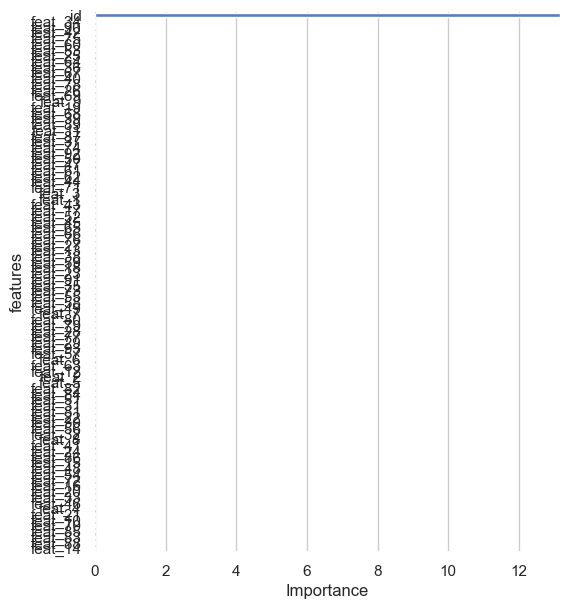

In [9]:
feature_imp = predictor.feature_importance(training_dataset)
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 7))

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(y=feature_imp.index, x=feature_imp.importance, label="Importance", color="b", ax=ax)

ax.set(xlim=(0, feature_imp.importance.max()+0.001), ylabel="features", xlabel="Importance")
sns.despine(left=True, bottom=True)

In [10]:
predictor.evaluate(training_dataset);

Evaluation: log_loss on test data: -0.00032794843022827905
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "log_loss": -0.00032794843022827905,
    "accuracy": 0.9999676783347878,
    "balanced_accuracy": 0.9999644484672068,
    "mcc": 0.9999611125845826
}


Accuracy score: 1.0
Precision score: 0.9999
Recall score: 1.0
F1 score: 1.0
F1 score: 1.0
Confusion Matrix


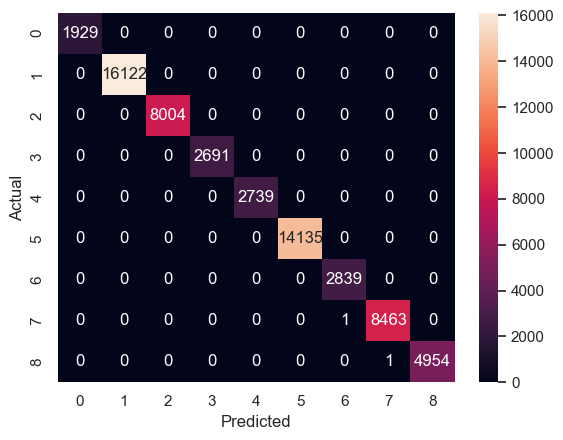

In [11]:
y_train_pred = predictor.predict(train_data.drop(columns=['target']))
display_metrics(train_data['target'], y_train_pred)

### Prediction on test set

In [12]:
test_dataset = TabularDataset.from_records(train_data)
submission = pd.DataFrame(data=predictor.predict_proba(test_dataset), columns=predictor.class_labels)
submission['predicted_target'] = predictor.predict(test_dataset)

In [13]:
submission.head(500)

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,predicted_target
0,0.999999,1.032091e-07,8.834531e-08,8.834531e-08,8.834531e-08,8.834531e-08,8.834531e-08,8.834531e-08,8.834531e-08,Class_1
1,0.999999,8.869311e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,Class_1
2,0.999999,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,Class_1
3,0.999999,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,Class_1
4,0.999999,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,Class_1
...,...,...,...,...,...,...,...,...,...,...
495,0.999999,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,Class_1
496,0.999999,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,Class_1
497,0.999999,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,Class_1
498,0.999999,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,8.834532e-08,Class_1
